<a href="https://colab.research.google.com/github/ashikshafi08/Learning-Fastai/blob/main/Fastai_Pawpularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive._mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Specifying the data paths 
train_image_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/'
test_image_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/'

train_df_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train.csv'
test_df_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test.csv'
sample_sub_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/sample_submission.csv'

In [3]:
!nvidia-smi

Fri Jan  7 23:53:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install -Uq fastai==2.5.3 # newer version


import fastai 
import pandas as pd 
import numpy as np
from fastai.vision.all import * 
from fastai import * 
print(fastai.__version__)

train_df = pd.read_csv(train_df_path)
test_df = pd.read_csv(test_df_path)

train_df.head()

     |████████████████████████████████| 189 kB 5.4 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
2.5.3


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [5]:
# Lets normalize the targets 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 

# Fit the scaler to our targets 
scaled_targets = scaler.fit_transform(np.expand_dims(train_df.Pawpularity , axis = 1))
scaled_targets

array([[0.62626263],
       [0.41414141],
       [0.27272727],
       ...,
       [0.19191919],
       [0.19191919],
       [0.29292929]])

In [6]:
# Applying PCA to condense the rest of the variables into one whole column 

X = train_df.drop(['Id' , 'Pawpularity'] , axis = 1)

from sklearn.decomposition import PCA 
pca = PCA(n_components = 1)

X_new = pca.fit_transform(X)
X_new



array([[ 0.05400829],
       [ 0.08657212],
       [-0.86495566],
       ...,
       [-0.86495566],
       [-0.51179131],
       [-0.13278019]])

In [7]:
# Appending the new cols 
train_df['Pawpularity_scaled'] = scaled_targets 
#train_df['reg_block'] = X_new

# Append the full path 
def append_ext(fn , train = True):
  if train:
    return f'{train_image_path}{fn}.jpg'
  else:
    return f'{test_image_path}{fn}.jpg'

# Applying the above function on our dataframe 
train_df['full_path'] = train_df['Id'].apply(lambda x: append_ext(x))
test_df['full_path'] = test_df['Id'].apply(lambda x: append_ext(x , train = False))

train_df.head(10)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,Pawpularity_scaled,full_path
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,0.626263,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0007de18844b0dbbb5e1f607da0606e0.jpg
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,0.414141,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0009c66b9439883ba2750fb825e1d7db.jpg
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,0.272727,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0013fd999caf9a3efe1352ca1b0d937e.jpg
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,0.141414,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0018df346ac9c1d8413cfcc888ca8246.jpg
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,0.717172,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/001dc955e10590d3ca4673f034feeef2.jpg
5,001dd4f6fafb890610b1635f967ea081,0,0,1,0,0,0,0,0,0,0,0,1,74,0.737374,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/001dd4f6fafb890610b1635f967ea081.jpg
6,0023b8a3abc93c712edd6120867deb53,0,1,1,1,0,0,0,0,1,1,0,0,22,0.212121,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0023b8a3abc93c712edd6120867deb53.jpg
7,0031d6a9ef7340f898c3e05f92c7bb04,0,1,1,0,0,0,1,1,0,0,1,0,35,0.343434,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0031d6a9ef7340f898c3e05f92c7bb04.jpg
8,0042bc5bada6d1cf8951f8f9f0d399fa,0,1,1,1,0,0,0,0,0,0,0,0,53,0.525253,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0042bc5bada6d1cf8951f8f9f0d399fa.jpg
9,0049cb81313c94fa007286e9039af910,0,1,1,1,0,0,0,0,0,0,0,0,21,0.202020,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0049cb81313c94fa007286e9039af910.jpg


In [8]:
item_tfms=RandomResizedCrop(460)
batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
train_data = Path(train_image_path)
train_data

Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train')

In [ ]:
train_df.columns

Index(['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur', 'Pawpularity',
       'Pawpularity_scaled', 'reg_block', 'full_path'],
      dtype='object')

In [ ]:
def get_y_1(df): return df['Pawpularity_scaled']
def get_y_2(df): return df['reg_block']

In [ ]:
# Constructing a DataBlock 

dblock = DataBlock(
    blocks = (ImageBlock() , RegressionBlock()),
    get_x = ColReader('full_path') , 
    get_y = ColReader('Pawpularity_scaled'), 
    #getters = [ColReader('full_path') , Pipeline([ColReader('reg_block') , ColReader('Pawpularity_scaled')])],
    item_tfms = Resize(224), 
    splitter = RandomSplitter(valid_pct = 0.15 , seed = 42), 
    batch_tfms = batch_tfms
)

dblock.summary(train_df)

Setting-up type transforms pipelines
0     0007de18844b0dbbb5e1f607da0606e0  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0007de18844b0dbbb5e1f607da0606e0.jpg
1     0009c66b9439883ba2750fb825e1d7db  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0009c66b9439883ba2750fb825e1d7db.jpg
2     0013fd999caf9a3efe1352ca1b0d937e  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0013fd999caf9a3efe1352ca1b0d937e.jpg
3     0018df346ac9c1d8413cfcc888ca8246  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0018df346ac9c1d8413cfcc888ca8246.jpg
4     001dc955e10590d3ca4673f034feeef2  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/001dc955e10590d3ca4673f034feeef2.jpg
...                                ...  ...                                                                                                               ...
9907  ffbfa0383

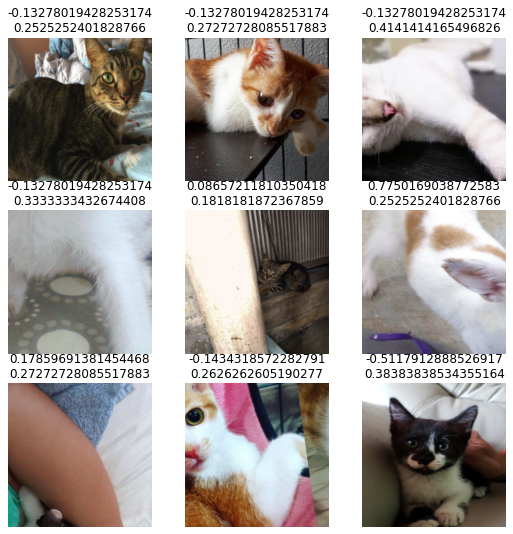

In [ ]:
dls = dblock.dataloaders(train_df , batch_size = 128)
dls.show_batch()

In [ ]:
get_image_files(items)

TypeError: ignored

In [9]:
# Creating a dls function 

def get_dls(bs , size):
 
  dblock = DataBlock(
    blocks = (ImageBlock() , RegressionBlock()), 
    get_x = ColReader('full_path') , 
    get_y = ColReader('Pawpularity_scaled'), 
    #get_x = ColReader('full_path') , 
    item_tfms = item_tfms, 
    splitter = RandomSplitter(valid_pct = 0.15 , seed = 42), 
    batch_tfms = batch_tfms)
  
  return dblock.dataloaders(train_df , bs = bs)

# Using the function and getting a dls 
dls = get_dls(32 , 224)


AttributeError: ignored

In [10]:
!nvidia-smi

Sat Jan  8 00:00:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    65W / 149W |    548MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
learn = cnn_learner(dls , arch = resnet50 , loss_func= BCELossFlat() , opt_func= Adam , 
                    metrics = [error_rate , rmse])

learn.fit_one_cycle(4 , 3e-3)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,_rmse,time


RuntimeError: ignored

### Using Low Level API 

In [ ]:
# Getting the filepaths in a list 
train_file_str = train_df.full_path.tolist()
items = [Path(string) for string in train_file_str]

items[:3]

[Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0007de18844b0dbbb5e1f607da0606e0.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0009c66b9439883ba2750fb825e1d7db.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0013fd999caf9a3efe1352ca1b0d937e.jpg')]

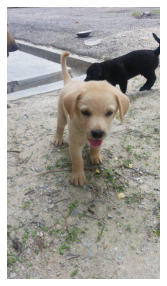

In [ ]:
# Trying to display a sample image 

im = PILImage.create(items[0])
im.show();

In [ ]:
# Specifying the random split 
splits = RandomSplitter(valid_pct= 0.15 , seed = 42)

# Passing the filepaths to the splitter 
splits = splits(items)

splits[0][:5] , splits[1][:4]

((#5) [6616,8252,4800,7139,1818], (#4) [9150,7444,208,1645])

In [ ]:
t = ToTensor()
i = IntToFloatTensor()
i(t(items[0]))

Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0007de18844b0dbbb5e1f607da0606e0.jpg')

In [ ]:
sample = PILImage.create(items[0])
print(f'Int to Float Tensor: \n{i(t(sample))}')
im_t = i(t(sample))

Int to Float Tensor: 
TensorImage([[[0.7451, 0.7569, 0.6941,  ..., 0.4745, 0.4706, 0.4667],
         [0.4275, 0.4549, 0.4353,  ..., 0.7059, 0.6980, 0.6902],
         [0.5176, 0.4941, 0.4588,  ..., 0.7059, 0.6941, 0.6745],
         ...,
         [0.6275, 0.6196, 0.5843,  ..., 0.8000, 0.7961, 0.7843],
         [0.6314, 0.6471, 0.6000,  ..., 0.7686, 0.7647, 0.7490],
         [0.6039, 0.6510, 0.6039,  ..., 0.7333, 0.7373, 0.7294]],

        [[0.7216, 0.7333, 0.6706,  ..., 0.4863, 0.4824, 0.4784],
         [0.4039, 0.4314, 0.4118,  ..., 0.7137, 0.7059, 0.6980],
         [0.5020, 0.4784, 0.4431,  ..., 0.7137, 0.7020, 0.6824],
         ...,
         [0.5922, 0.5843, 0.5490,  ..., 0.7961, 0.7922, 0.7804],
         [0.5961, 0.6118, 0.5647,  ..., 0.7647, 0.7608, 0.7451],
         [0.5686, 0.6157, 0.5686,  ..., 0.7294, 0.7333, 0.7255]],

        [[0.7765, 0.7882, 0.7255,  ..., 0.5529, 0.5490, 0.5451],
         [0.4588, 0.4863, 0.4667,  ..., 0.7725, 0.7647, 0.7569],
         [0.5569, 0.5333, 0.498

In [ ]:
norm = Normalize.from_stats([0.5]*3 , [0.5]*3)
norm(im_t)

RuntimeError: ignored

In [ ]:
_tfm = RegressionSetup()

dsets = Datasets([0 , 1 ,2] , RegressionSetup)
dsets

(#3) [(tensor(0.),),(tensor(1.),),(tensor(2.),)]

In [ ]:
Datasets(scaled_targets , RegressionSetup)


(#9912) [(tensor([0.6263]),),(tensor([0.4141]),),(tensor([0.2727]),),(tensor([0.1414]),),(tensor([0.7172]),),(tensor([0.7374]),),(tensor([0.2121]),),(tensor([0.3434]),),(tensor([0.5253]),),(tensor([0.2020]),)...]

In [ ]:
def open_img(fn): 
  return PILImage.create(fn)

def img2tensor(im):
  return TensorImage(im)

image2tensor(open_img(items[0]))

tensor([[[190, 193, 177,  ..., 121, 120, 119],
         [109, 116, 111,  ..., 180, 178, 176],
         [132, 126, 117,  ..., 180, 177, 172],
         ...,
         [160, 158, 149,  ..., 204, 203, 200],
         [161, 165, 153,  ..., 196, 195, 191],
         [154, 166, 154,  ..., 187, 188, 186]],

        [[184, 187, 171,  ..., 124, 123, 122],
         [103, 110, 105,  ..., 182, 180, 178],
         [128, 122, 113,  ..., 182, 179, 174],
         ...,
         [151, 149, 140,  ..., 203, 202, 199],
         [152, 156, 144,  ..., 195, 194, 190],
         [145, 157, 145,  ..., 186, 187, 185]],

        [[198, 201, 185,  ..., 141, 140, 139],
         [117, 124, 119,  ..., 197, 195, 193],
         [142, 136, 127,  ..., 194, 191, 186],
         ...,
         [152, 150, 141,  ..., 199, 198, 195],
         [153, 157, 145,  ..., 191, 190, 186],
         [146, 158, 146,  ..., 182, 183, 181]]], dtype=torch.uint8)

In [ ]:
tfms = [[open_img , img2tensor] , 
        []]

In [ ]:
# Making a dataset 

dset = Datasets(items = items , tfms = [[PILImage.create] , [scaled_targets , RegressionSetup]], 
                splits = splits)

dset

ValueError: ignored

In [ ]:
dsets = Datasets( train_df , 
                 [
                  [ColReader('full_path') , 
                   PILImage.create , 
                   Resize(224) , 
                   ToTensor() , 
                   IntToFloatTensor()], 
                  
                  [ColReader('reg_block') , RegressionSetup()] , 
                  [ColReader('Pawpularity_scaled') , RegressionSetup()] ,
                 ] , 
                 splits = RandomSplitter(valid_pct= 0.15))
dsets[0]

TypeError: ignored

In [ ]:
# Applying some important transforms 
tfms = [ToTensor() , Resize(448 , method = ResizeMethod.Pad) ]
gpu_tfms = [IntToFloatTensor() , Normalize()]



In [ ]:
# Creating a dataloaders 
dls = dset.dataloaders(bs = 64, after_item= tfms , after_batch =gpu_tfms)
dls.show_batch()

TypeError: ignored

In [ ]:
dset.dataloaders??